<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
Mean Squared Error= 24.2911
R2-score= 0.6688


C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


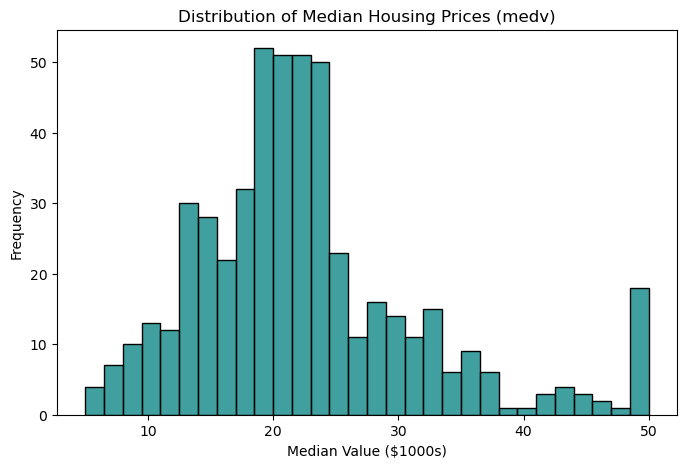

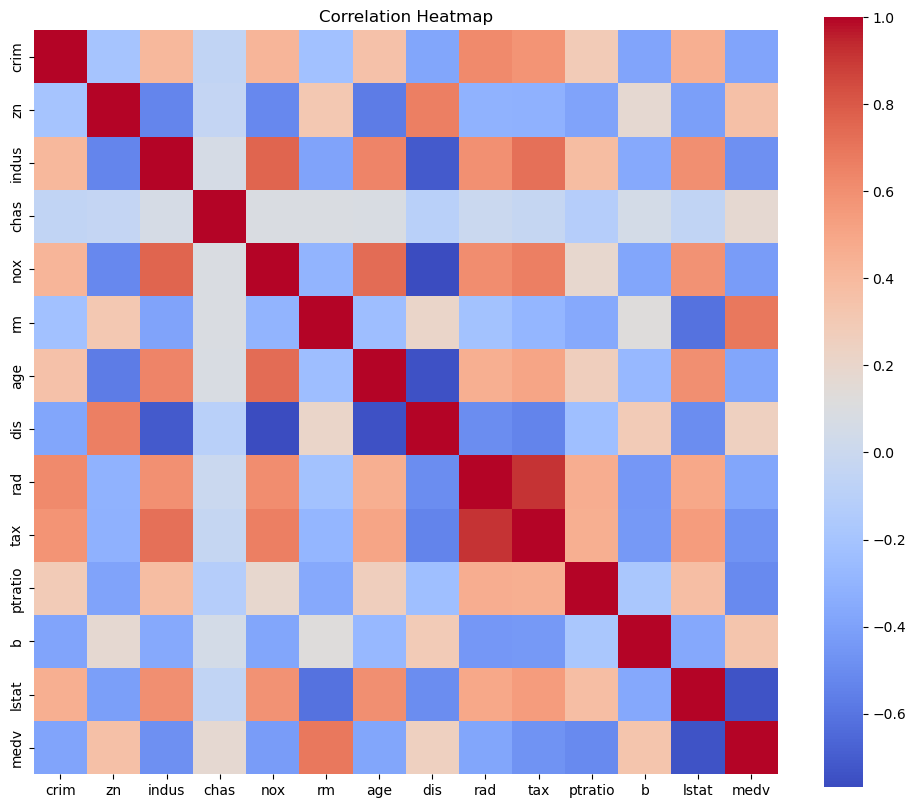

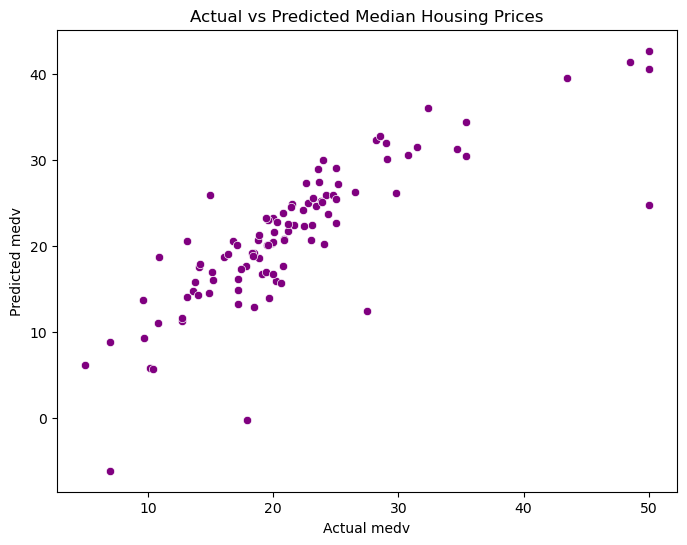

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df= pd.read_csv("BostonHousing.csv")
df.head()

print(df.info())

df.isnull().sum()

scaler= StandardScaler()
X_scaled= scaler.fit_transform(df)

X= df.drop('medv', axis=1)
y= df['medv']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)
LR= LinearRegression()
LR.fit(X_train, y_train)

y_pred= LR.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
print("Mean Squared Error= %.4f"%(mse))
r2= r2_score(y_test, y_pred)
print("R2-score= %.4f"%r2)

plt.figure(figsize=(8, 5))
sns.histplot(df['medv'], bins=30, color='teal')
#sns.histplot(df['medv'], kde=True, bins=30, color='teal')
plt.title("Distribution of Median Housing Prices (medv)")
plt.xlabel("Median Value ($1000s)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", square=True)
#sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual medv")
plt.ylabel("Predicted medv")
plt.title("Actual vs Predicted Median Housing Prices")
plt.show()